* Practice loading CSV files into Python using the [`CSV.reader()`](https://docs.python.org/2/library/csv.html) function in the standard library
* Practice loading CSV files using NumPy and the [`numpy.loadtxt()`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.loadtxt.html) function
* Practice loading CSV files using Pandas and the [`pandas.read_csv()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function

### Advanced seaborn
* http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/
* http://twiecki.github.io/blog/2014/11/18/python-for-data-science/

In [1]:
# Allow Jupyter Notebook to render plots inline
%matplotlib inline

In [2]:
####### IGNORE Warning that appears when executing this cell, it is an implementation issue for the seaborn module

# Load modules
import matplotlib
import matplotlib.pyplot as plt
import os as os
import pandas as pd
import sqlalchemy as sa
import seaborn as sns

# Load classes
from time import strftime
from pandas.tools.plotting import scatter_matrix

C:\Miniconda3\envs\sandpit\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
# create engine
engine_name = 'mssql+pyodbc'
host_name = 'au04db502nml3'
db_name = 'OneViewStaging_Telfer'
driver_name = 'SQL+Server+Native+Client+11.0'
cx = engine_name + '://' + host_name + '/' + db_name + '?driver=' + driver_name
engine = sa.create_engine(cx)

In [4]:
# define the query here to select the data wanted
sql = """
        select
            [StartDateTime]
            ,[Total Material Moved (t)]
            ,[Total ExPit Material Moved (t)]
            ,[Total ExPit Ore (t)]
            ,[Direct Feed & OP Rehandle (t)]
            ,[Direct Feed (t)]
            ,[Leach Ore (t)]
            ,[ExPit Ore (t)]
            ,[Waste (t)]
            ,[Rehandle (t)]
            ,[Relocation (t)]
            ,[TopSoil (t)]
            ,[Scats (t)]
            ,[MReef (OP) (t)]
            ,[SLC (t)]
            ,[M35 (t)] 
        from
            [dbo].[tb_OPCO_TELReconcilorData] 
        order by
            StartDateTime
        ;"""

In [5]:
# get the data from the db
df = pd.read_sql(sql, engine)

In [6]:
# We're' going to 'clean' the data of null values; the following columns have no
# data in them so we need to remove them to ensure our cleaning in the next step 
# doesn't delete all the data
cols_to_drop = ['TopSoil (t)']
df.drop(cols_to_drop, axis=1, inplace=True) 

# get rid of rows with nulls
# and add column with day of week to use for analysis
df.dropna(axis=0, how='any', inplace=True)
df['Day Of Week'] = (df['StartDateTime']).dt.dayofweek

In [7]:
# Summary stats for the results in the query
df.describe().transpose()

count           mean           std      min  \
Total Material Moved (t)         57.0  107863.561404  17303.205930  70338.0   
Total ExPit Material Moved (t)   57.0   68173.631579  14781.200515  32296.0   
Total ExPit Ore (t)              57.0   39850.859649  18667.368628   2928.0   
Direct Feed & OP Rehandle (t)    57.0   47279.228070  12535.078728   6588.0   
Direct Feed (t)                  57.0   20889.385965  13338.240330   1347.0   
Leach Ore (t)                    57.0    8052.614035   7814.593586    441.0   
ExPit Ore (t)                    57.0   10908.859649   8598.550294    246.0   
Waste (t)                        57.0   28322.771930  18512.587420   1170.0   
Rehandle (t)                     57.0   25381.280702  13579.823176   1395.0   
Relocation (t)                   57.0    2149.719298   2530.000161    173.0   
Scats (t)                        57.0   11150.368421   2037.681610   6867.0   
MReef (OP) (t)                   57.0    1008.561404    462.662289    194.0   
SLC (t)                          57.0   13530.701754   4147.210276    430.0   
M35 (t)                          57.0     898.175439    377.152069    101.0   
Day Of Week                      57.0       3.438596      1.991209      0.0   

                                    25%       50%       75%       max  
Total Material Moved (t)        98240.0  105685.0  116237.0  165799.0  
Total ExPit Material Moved (t)  60391.0   67918.0   76299.0  118559.0  
Total ExPit Ore (t)             25845.0   38293.0   50526.0   82386.0  
Direct Feed & OP Rehandle (t)   40709.0   48821.0   55431.0   69876.0  
Direct Feed (t)                 10233.0   18091.0   29725.0   52048.0  
Leach Ore (t)                    2226.0    4528.0   12558.0   30588.0  
ExPit Ore (t)                    4337.0    8125.0   16598.0   39774.0  
Waste (t)                       13493.0   26554.0   39336.0   82553.0  
Rehandle (t)                    15108.0   23802.0   34491.0   52426.0  
Relocation (t)                    237.0     697.0    3805.0    8512.0  
Scats (t)                        9560.0   11065.0   12153.0   16888.0  
MReef (OP) (t)                    682.0     962.0    1228.0    2179.0  
SLC (t)                         11750.0   14320.0   16040.0   22160.0  
M35 (t)                           604.0     990.0    1198.0    1618.0  
Day Of Week                         2.0       4.0       5.0       6.0

In [17]:
# Lets view the first 5 rows of the data set
df.head()

Total Material Moved (t)  Total ExPit Material Moved (t)  \
4                   120149.0                         58387.0   
7                   119014.0                         69818.0   
9                   103769.0                         64781.0   
10                  105386.0                         76665.0   
18                   97442.0                         81449.0   

    Total ExPit Ore (t)  Direct Feed & OP Rehandle (t)  Direct Feed (t)  \
4               27402.0                        52557.0           2781.0   
7               49222.0                        60999.0          25233.0   
9               49020.0                        41465.0          13163.0   
10              75495.0                        63647.0          52048.0   
18              64235.0                        48802.0          44552.0   

    Leach Ore (t)  ExPit Ore (t)  Waste (t)  Rehandle (t)  Relocation (t)  \
4         22975.0         1646.0    30985.0       49302.0           728.0   
7         15478.0         8511.0    20596.0       33778.0           237.0   
9         27540.0         8317.0    15761.0       27301.0          2460.0   
10         6878.0        16569.0     1170.0       10380.0           234.0   
18         2035.0        17648.0    17214.0        2511.0           588.0   

    Scats (t)  MReef (OP) (t)  SLC (t)  M35 (t)  Day Of Week  
4     11258.0           474.0   8180.0    730.0            1  
7     13193.0          1988.0   7610.0   1077.0            4  
9      8226.0          1001.0  15640.0   1198.0            6  
10    16888.0          1219.0  16040.0   1252.0            0  
18    11155.0          1739.0  10440.0   1196.0            1

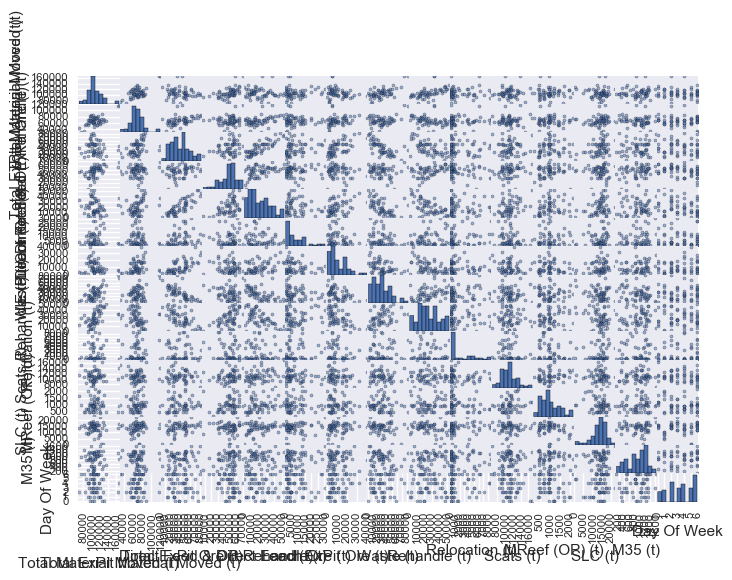

In [9]:
# Use default plotting options to forma scatter matrix
fig1 = scatter_matrix(df)

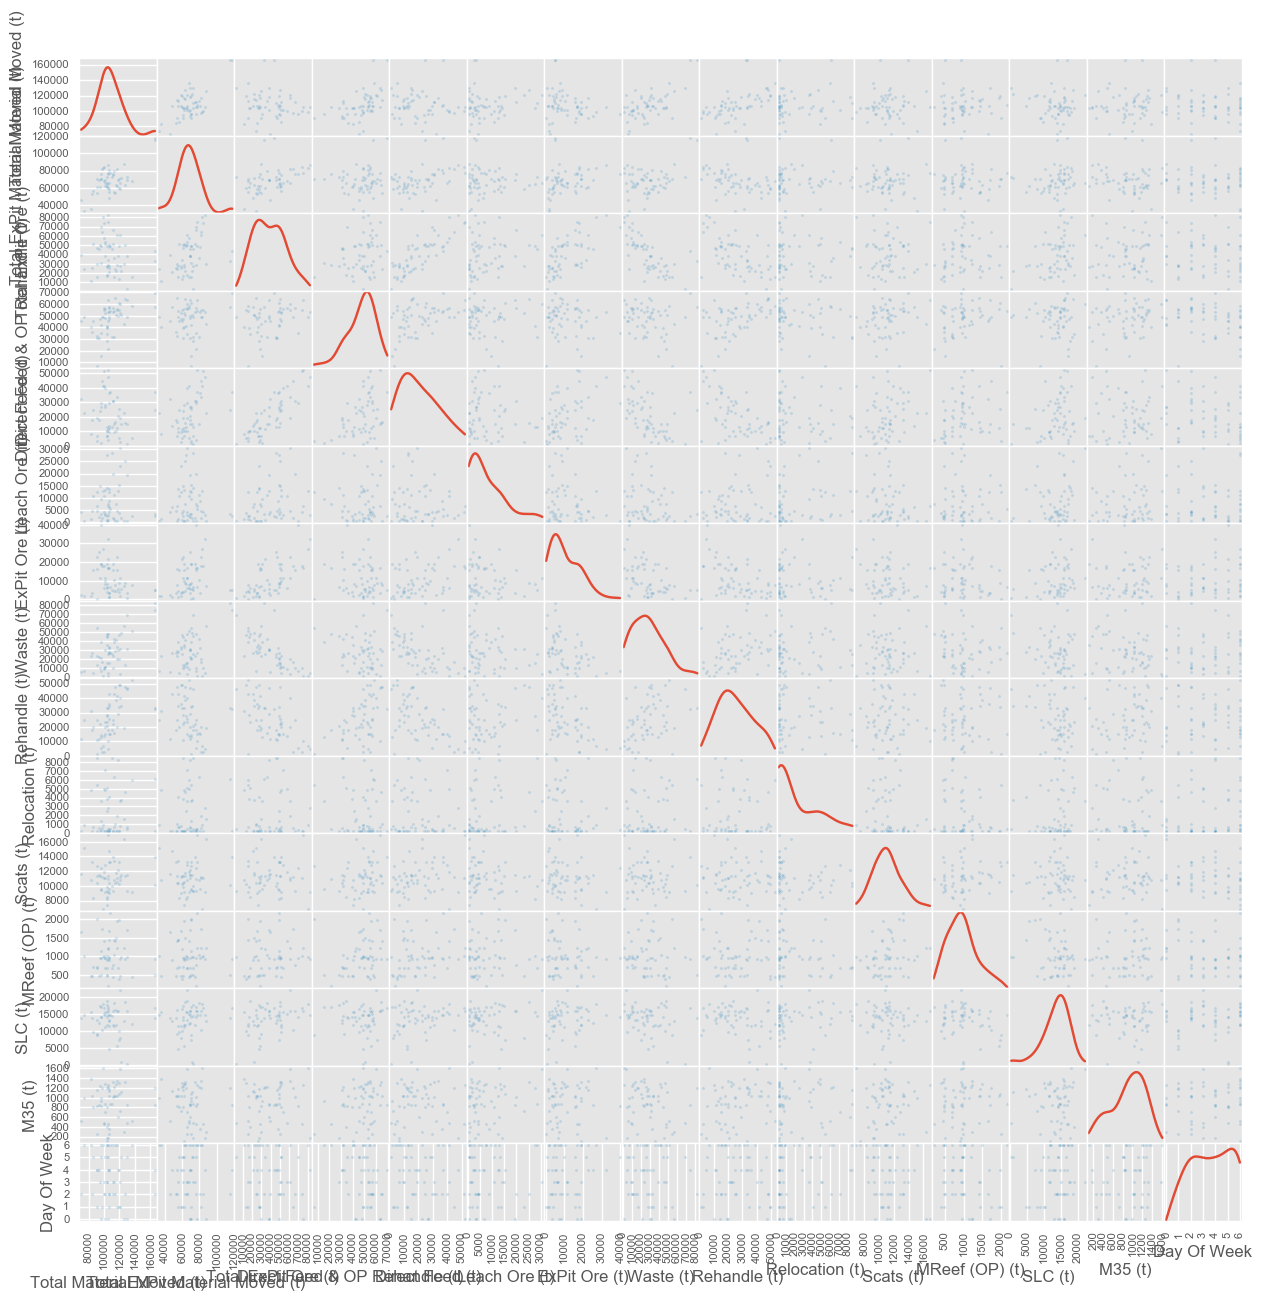

In [10]:
# Lets format the scatter matrix differently
matplotlib.style.use('ggplot')
fig2 = scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde')

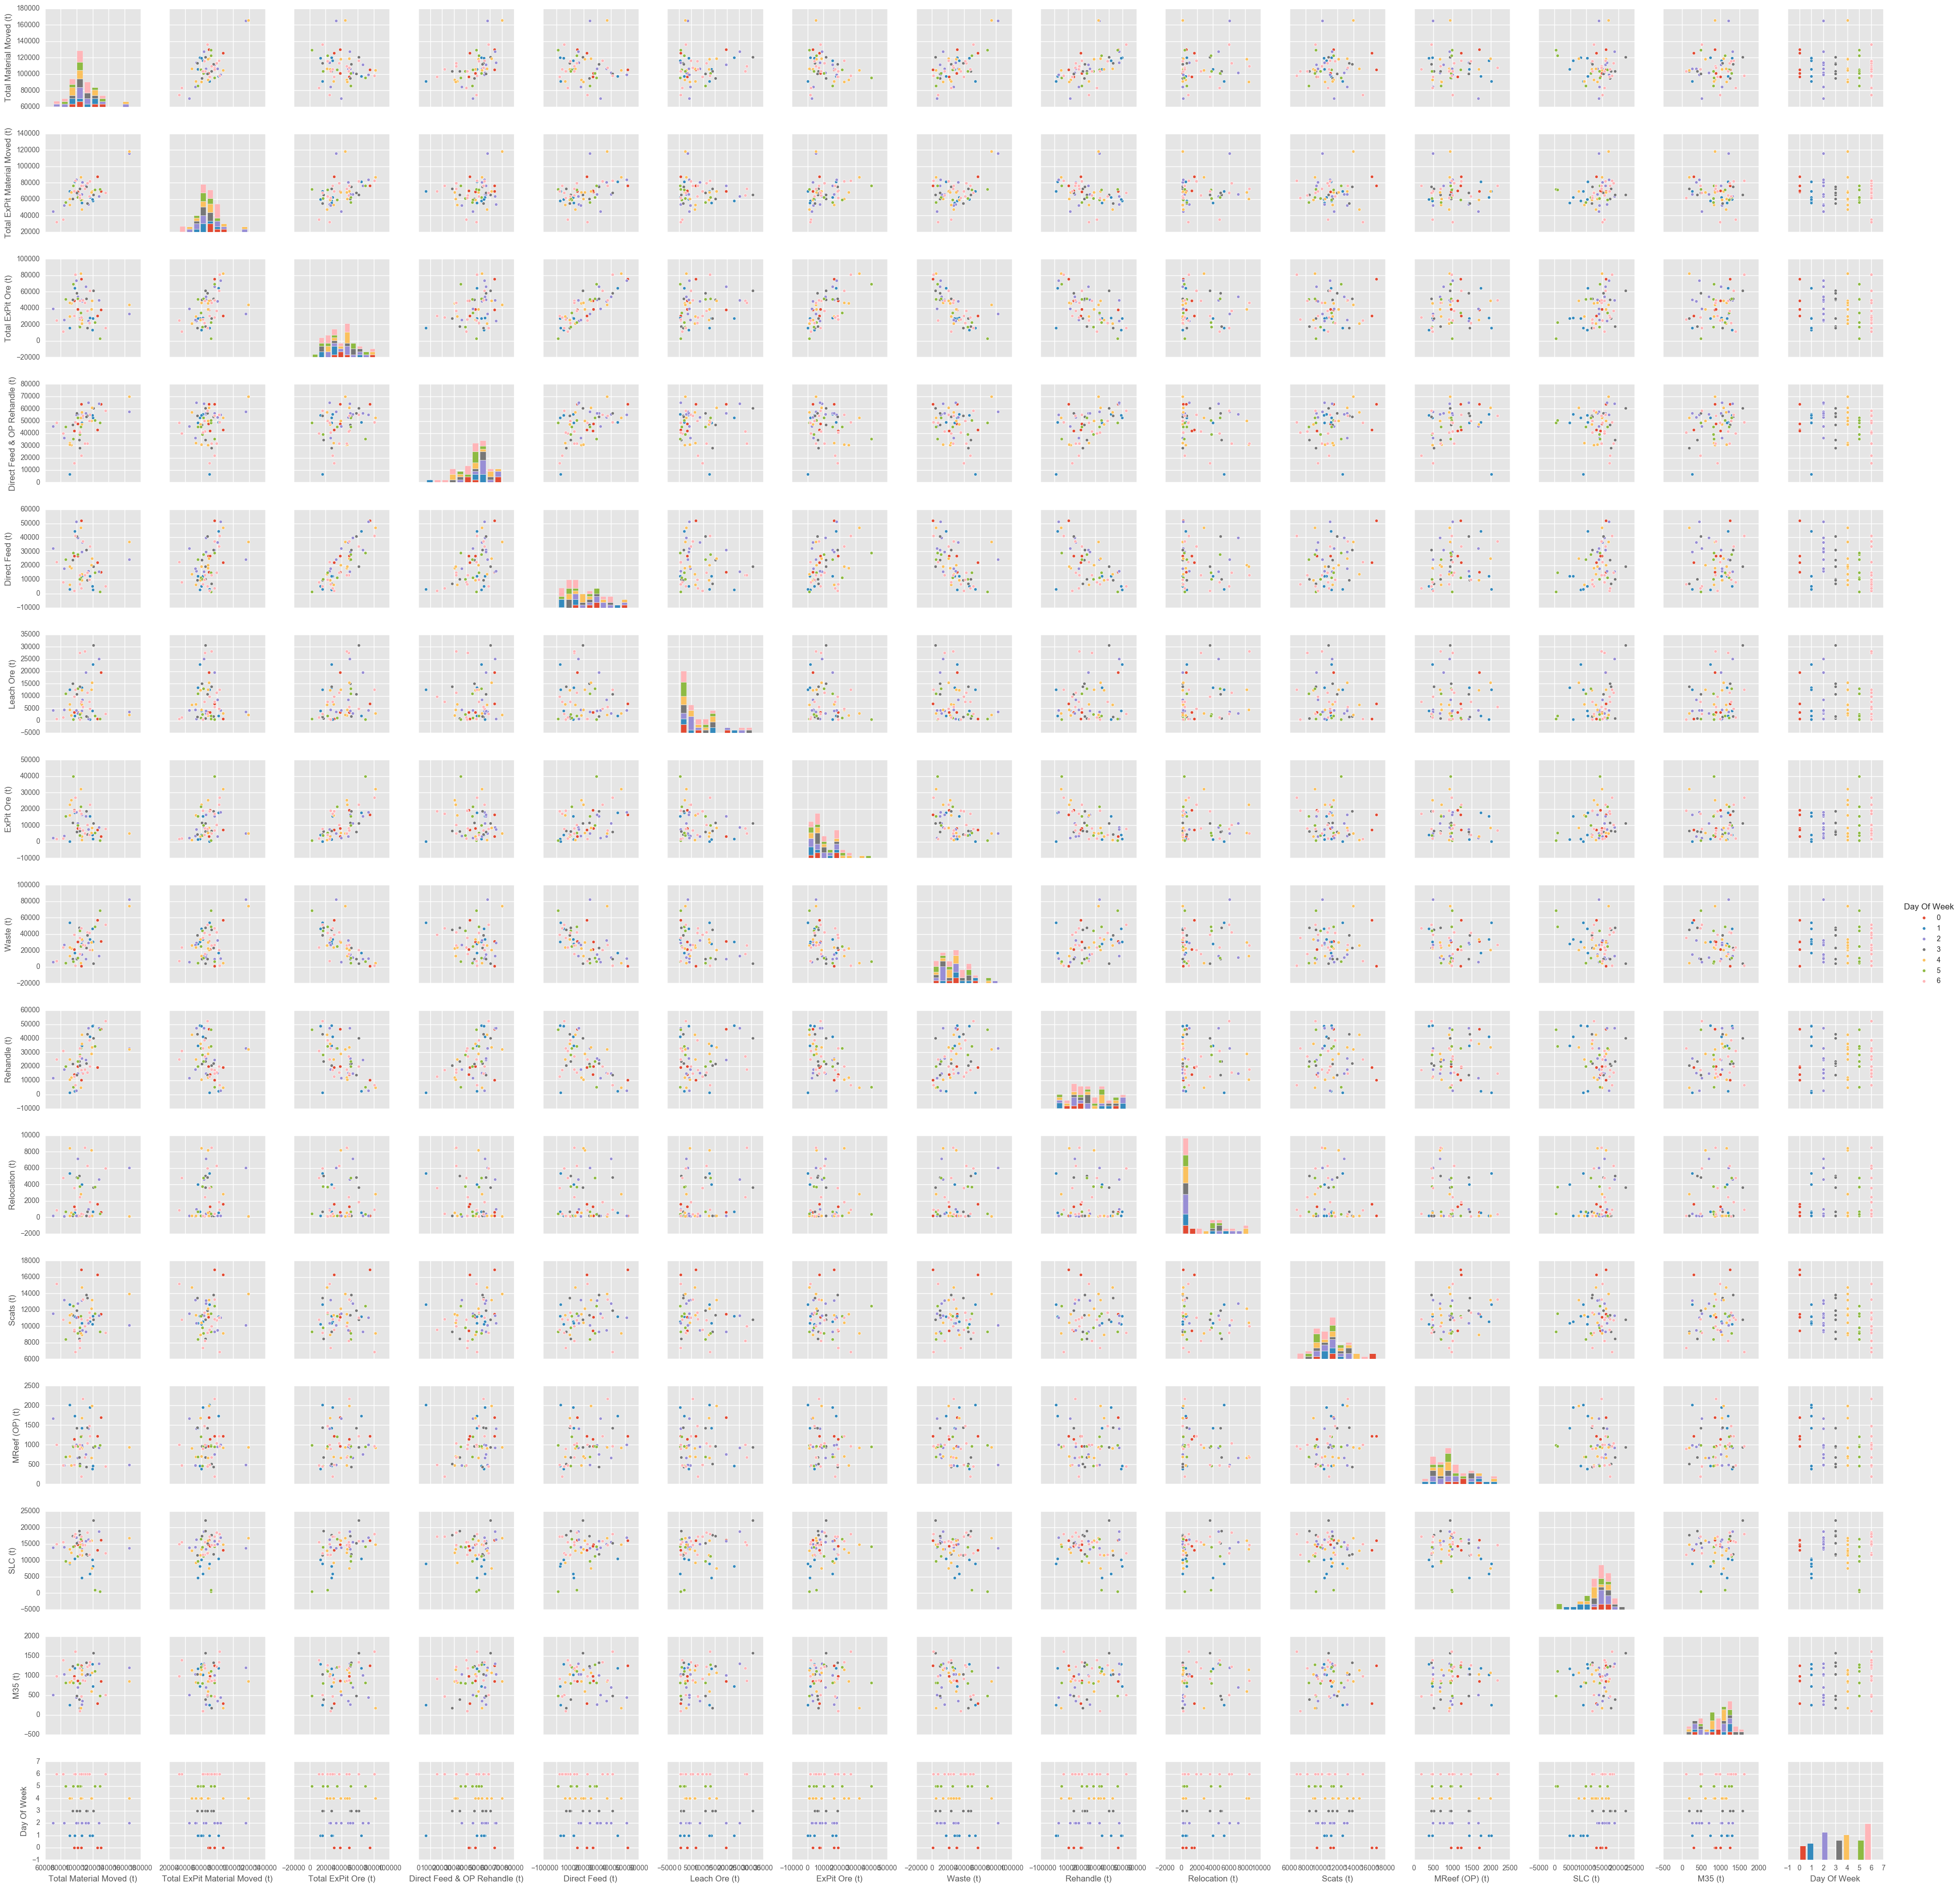

In [11]:
# Perform scatter matrix with another viz library - seaborn - using its defaults
fig3 = sns.pairplot(df, hue="Day Of Week")

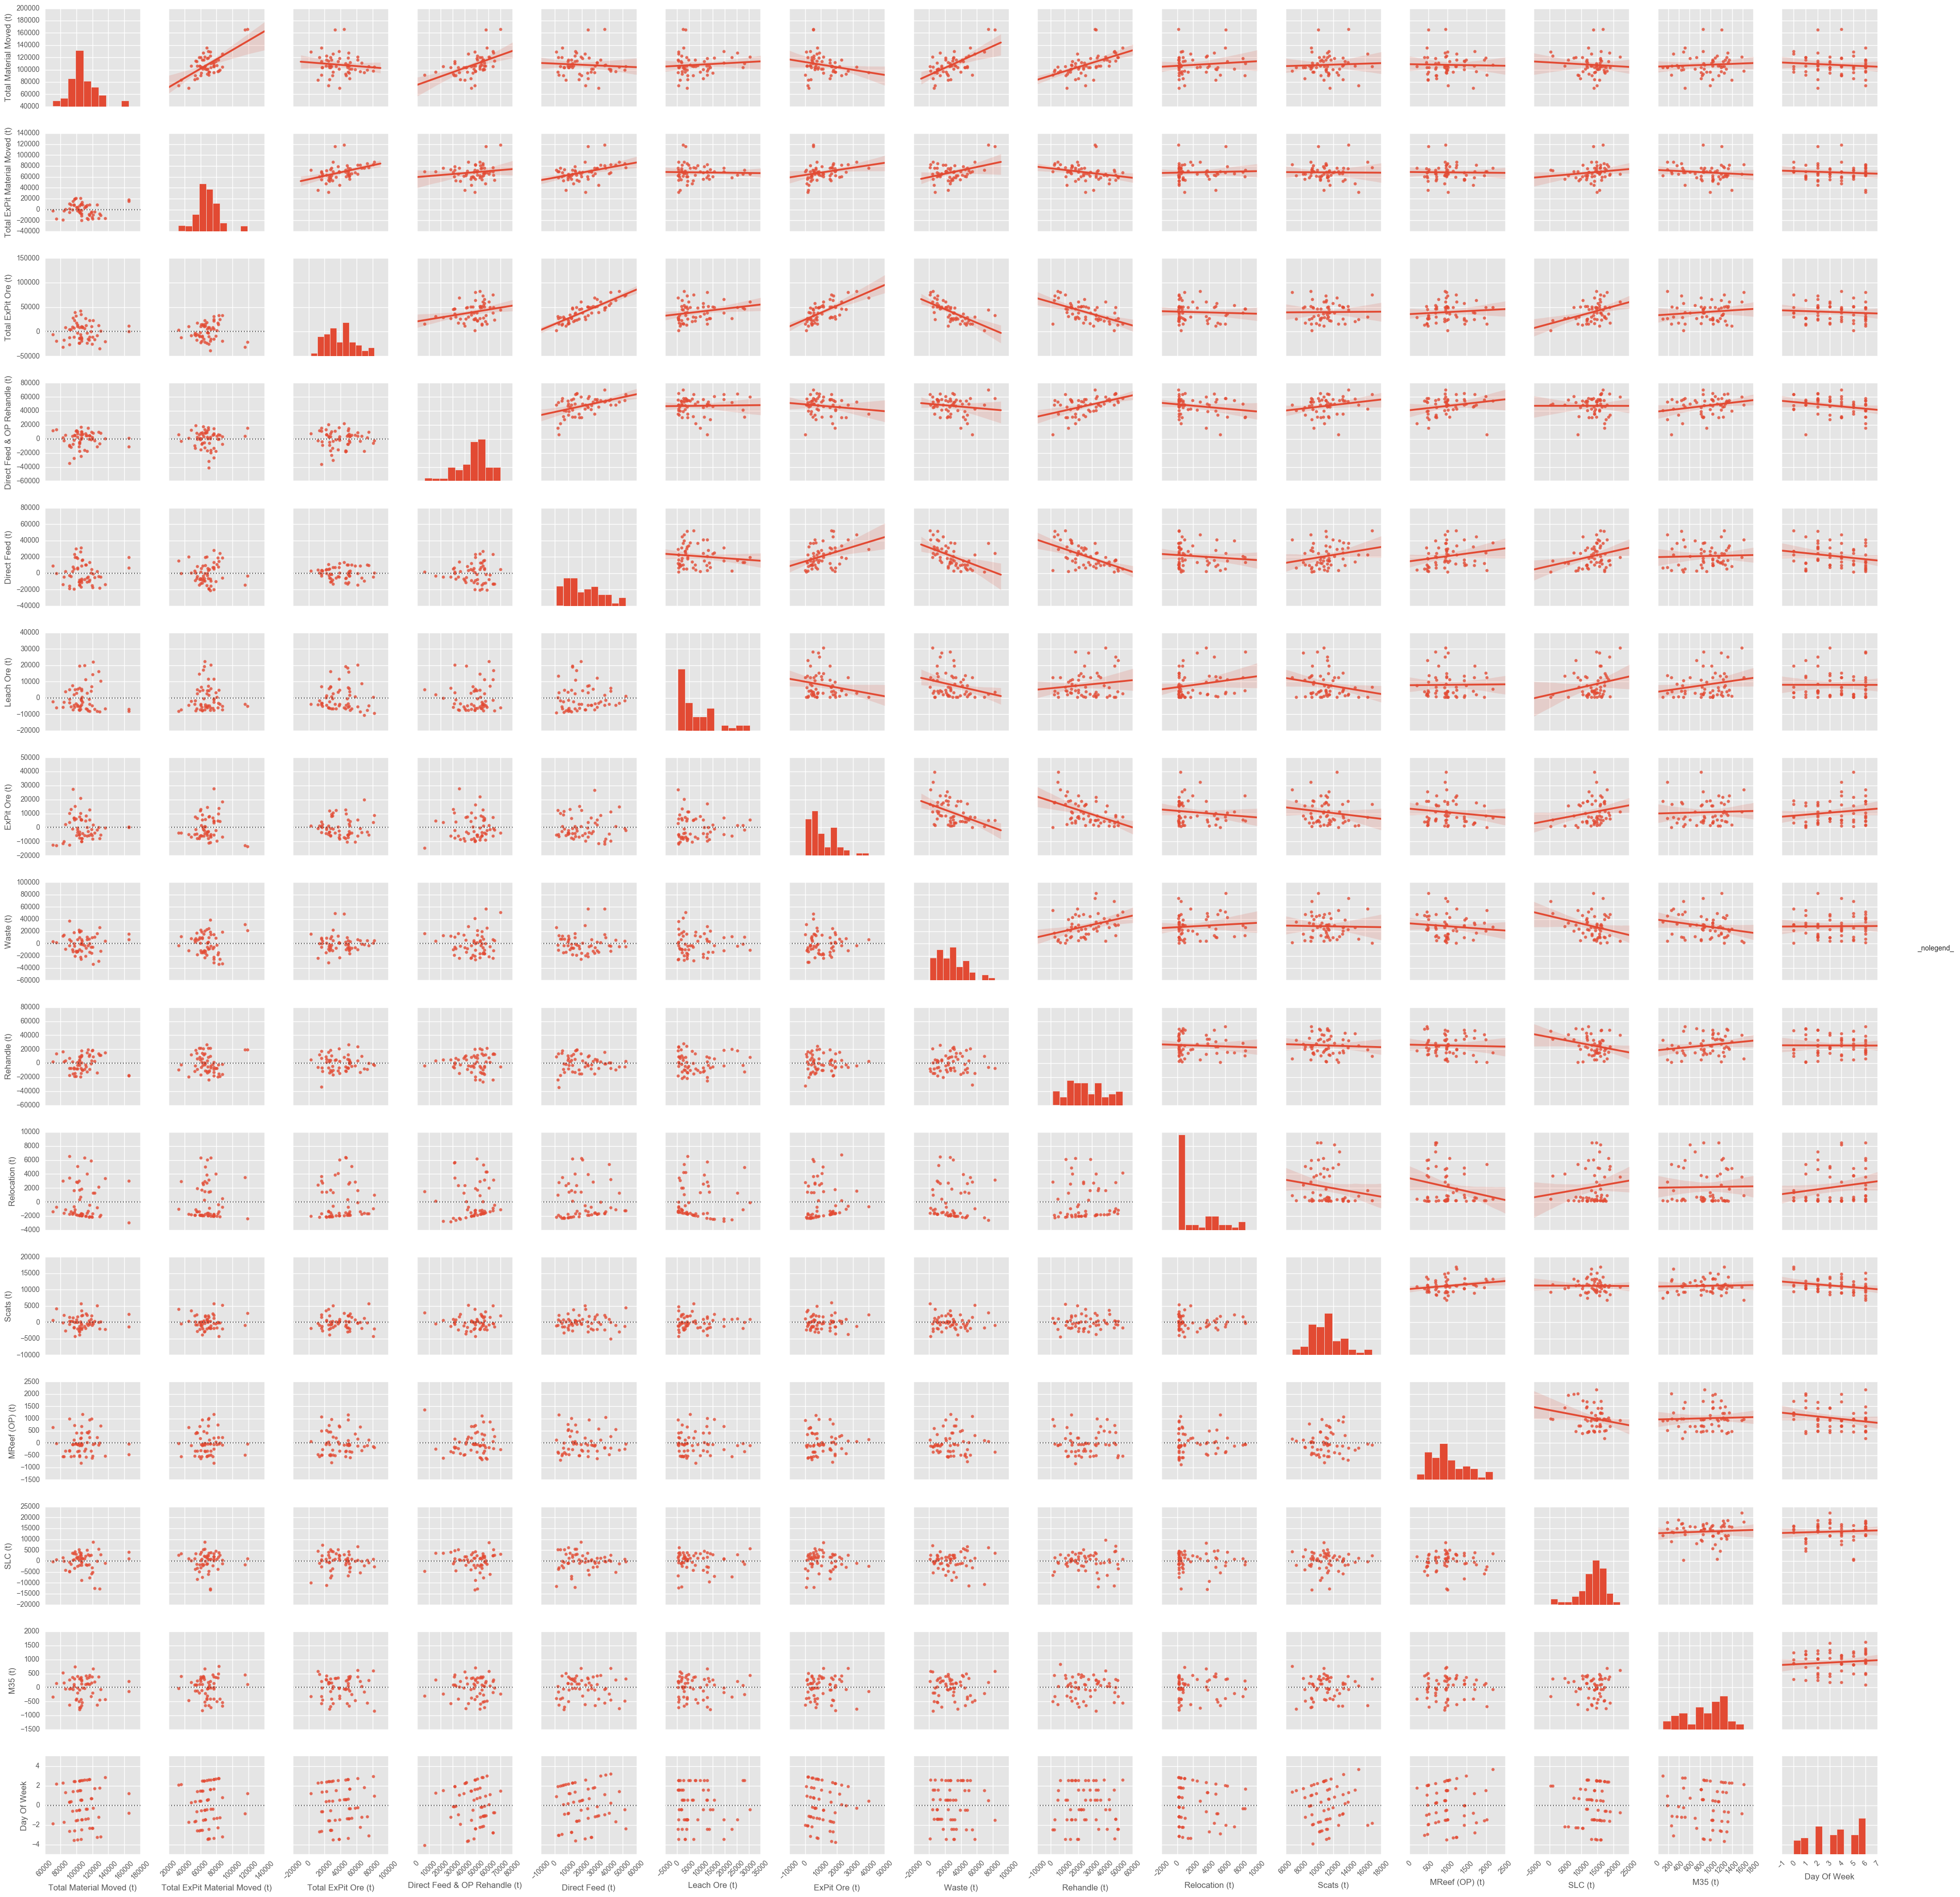

In [12]:
# Lets do the same thing again removing the analysis at the "Day of Week" level
# The upper half of the matrix triangle will have regression plots for the pairs
# The diagonal will have distribution plots for the variable/feature in question
# The lower half of the triangle will have residual plots for the the pairs
fig4 = sns.PairGrid(df)  
fig4.map_upper(sns.regplot)  
fig4.map_lower(sns.residplot)  
fig4.map_diag(plt.hist)

for ax in fig4.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)
    
fig4.add_legend()  
fig4.set(alpha=0.5)

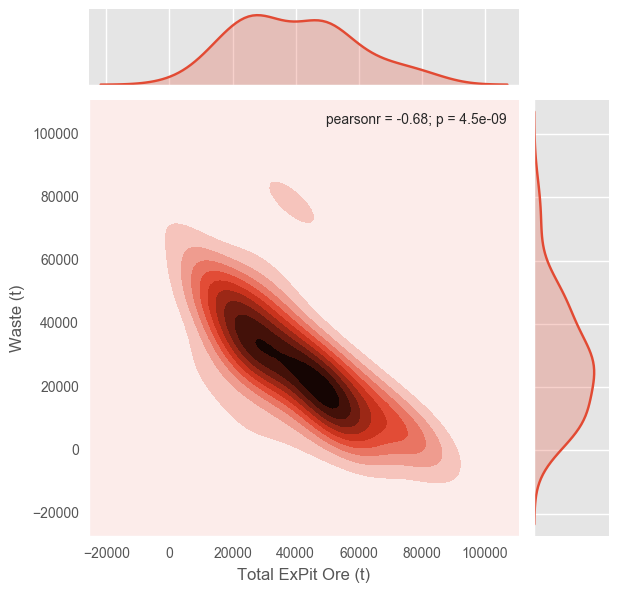

In [13]:
# Lets view "Total ExPit Ore (t)" vs "Waste (t)" as there potentially
# looks to be a linear relationship
fig5 = sns.jointplot("Total ExPit Ore (t)", "Waste (t)", data=df, kind='kde')

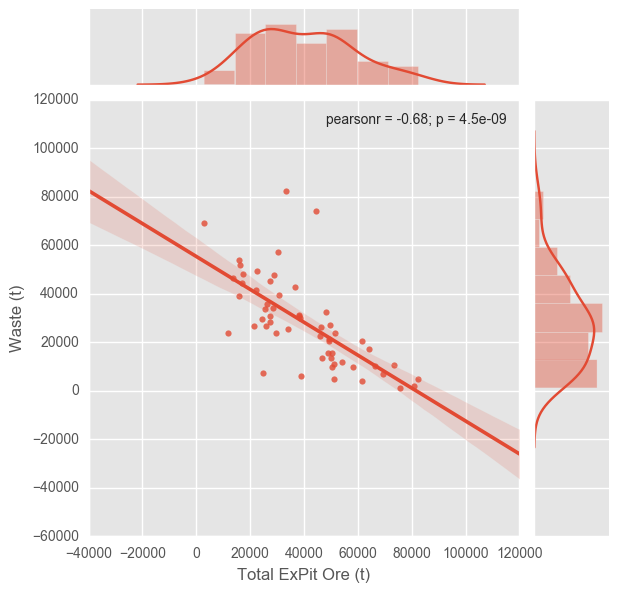

In [14]:
# Lets view the same relationship, just styled differently
fig6 = sns.jointplot("Total ExPit Ore (t)", "Waste (t)", data=df, kind='reg')

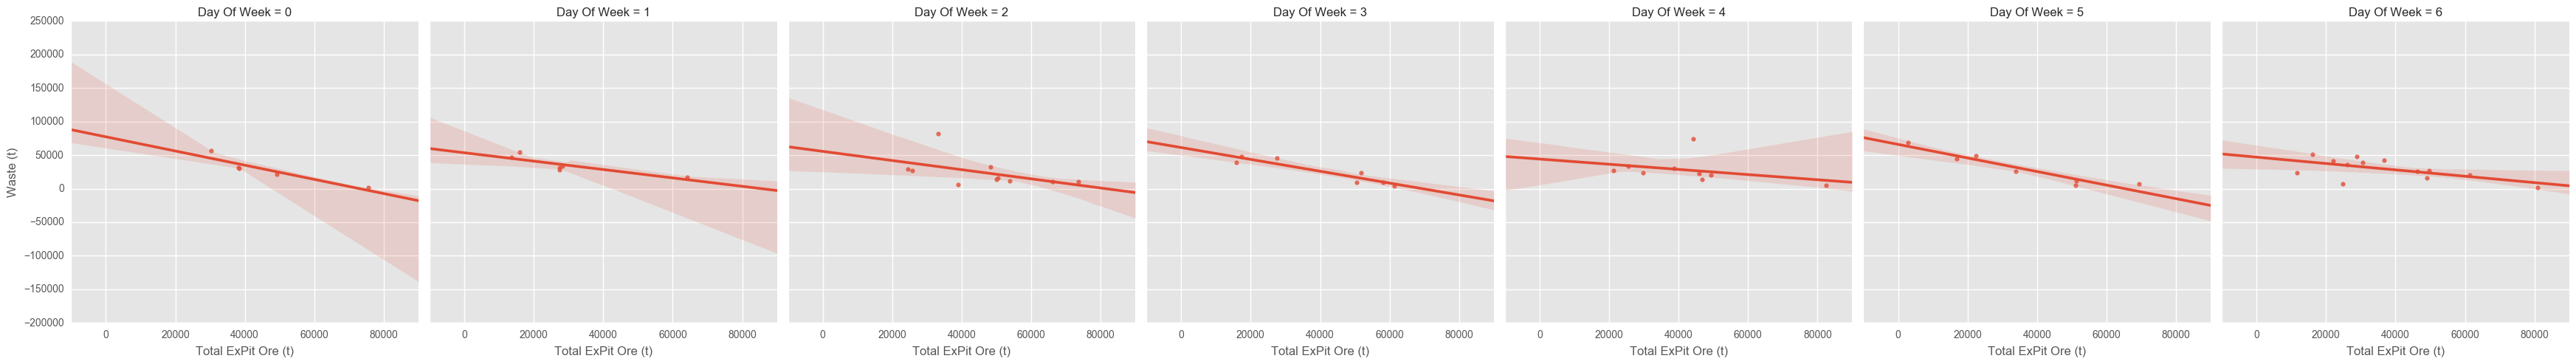

In [15]:
# Look at the relationship through the days of the week
fig7 = sns.lmplot(x="Total ExPit Ore (t)", y="Waste (t)", data=df, col="Day Of Week", order=1);

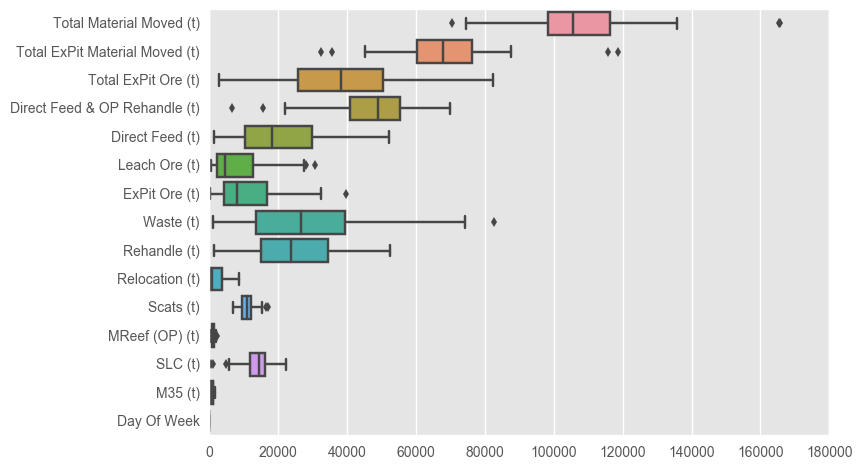

In [16]:
# Create a box plot of the varaibles/features
date_cols_to_drop = ["Day Of Week", "StartDateTime"]
df = df.drop(date_cols_to_drop[1], axis=1)
fig8 = sns.boxplot(data=df, orient="h")